# Phase plane portraits and analysis

## Four stationary points

Let's consider a following system of ODEs:

$$ \frac{dx(t)}{dt} = 15x^2 + 9y^2 - 15, \frac{dy(t)}{dt} = 16x^2 - 16y^2 $$

We find all stationary points.

In [1]:
from CommonFunctions import *
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [2]:
t = sp.Symbol('t')
x = sp.Function('x')(t)
y = sp.Function('y')(t)

In [3]:
P_eq = sp.Eq(x.diff(t), 16 * x**2 + 9 * y**2 - 25)
P_eq

Eq(Derivative(x(t), t), 16*x(t)**2 + 9*y(t)**2 - 25)

In [4]:
Q_eq = sp.Eq(y.diff(t), 16 * x**2 - 16 * y**2)
Q_eq

Eq(Derivative(y(t), t), 16*x(t)**2 - 16*y(t)**2)

In [5]:
fixed_points = sp.solve([P_eq.rhs, Q_eq.rhs], [x, y])
fixed_points

[(-1, -1), (-1, 1), (1, -1), (1, 1)]

Now we find parameters a, b, c, d:

In [6]:
a, b, c, d = find_fixed_point_abcd(P_eq, Q_eq, x, y)
print(f'$a = {a}$\n $b = {b}$\n $c = {c}$\n $d = {d}$')

$a = 32*x(t)$
 $b = 18*y(t)$
 $c = 32*x(t)$
 $d = -32*y(t)$


And now we calculate parameters $q, p, r$ for fixed point $(-1, 1)$:

In [7]:
fixed_point = fixed_points[1]
fixed_point

(-1, 1)

In [8]:
q, p, r = find_fixed_point_parameters(P_eq, Q_eq, x, y, fixed_point=fixed_point)
print(f'$q = {q}$\n $p = {p}$\n $r = {r}$')

$q = 1600.00000000000$
 $p = 64.0000000000000$
 $r = -2304.00000000000$


And now we can classify it:

In [9]:
classify_fixed_point(q, p, r)

'stable focal'

Let's check all fixed points:

In [10]:
for point in fixed_points:
    q, p, r = find_fixed_point_parameters(P_eq, Q_eq, x, y, fixed_point=point)
    print(f'{point}: {classify_fixed_point(q, p, r)}')

(-1, -1): saddle
(-1, 1): stable focal
(1, -1): unstable focal
(1, 1): saddle


And now we plot it:

In [11]:
a, b = -2, 2
x_step, v_step = .125, .125
parameters = (a, b, x_step, a, b, v_step)
t_a, t_b = -1, 1
quality = 500

In [12]:
init_x = [0, 0, 0, 0, 0, 1.25, -1.25, 1.25, -1.25]
init_y = [0, 1/2, -1/2, 1, -1, 1.25, 1.25, -1.25, -1.25]
trajectories = calculate_numerically_list_of_trajectories(
    [P_eq.rhs, Q_eq.rhs], [x, y], t, (t_a, t_b), 0, [(a, b), (a, b)], zip(init_x, init_y), quality
)

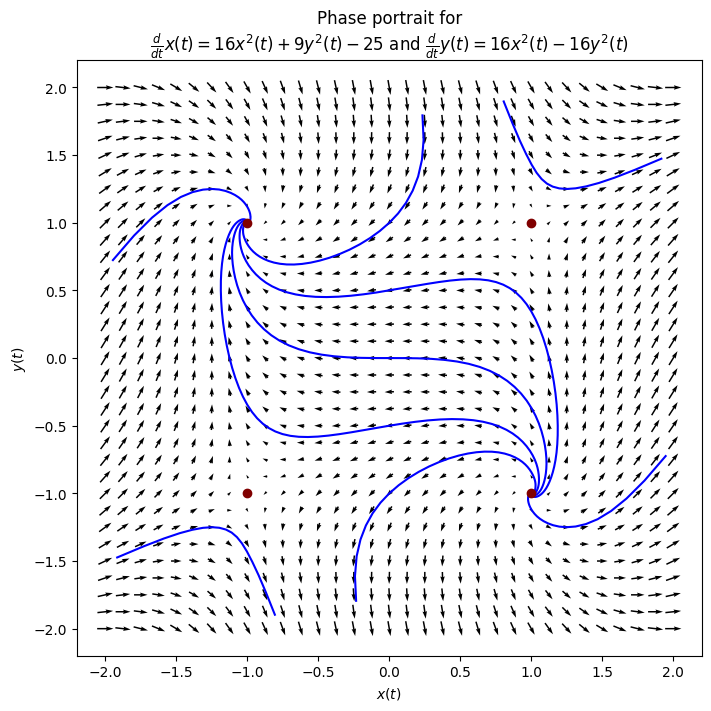

In [16]:
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 7))
phase_portrait([P_eq, Q_eq], [x, y], parameters, axes, normalize=False, damping_factor=0.5)
for trajectory in trajectories:
    axes.plot(*trajectory, color='blue')
axes.scatter(*zip(*fixed_points), color='maroon', zorder=10)
_=axes.set(title=f'Phase portrait for\n${sp.latex(P_eq)}$ and ${sp.latex(Q_eq)}$')

# Lorenz's Butterfly

In this section we plot Lorenz's system of ODEs:

$$ \dot{x} = \sigma(y - z) $$

$$ \dot{y} = rx - y - xz $$

$$ \dot{z} = xy - bz $$